## Scraping Reddit and posting to Pandas
inspiration for this notebook:
https://recycledrobot.co.uk/words/?web-scraping

quick tutorial: how to build a table with plotly.
https://plotly.com/python/table/

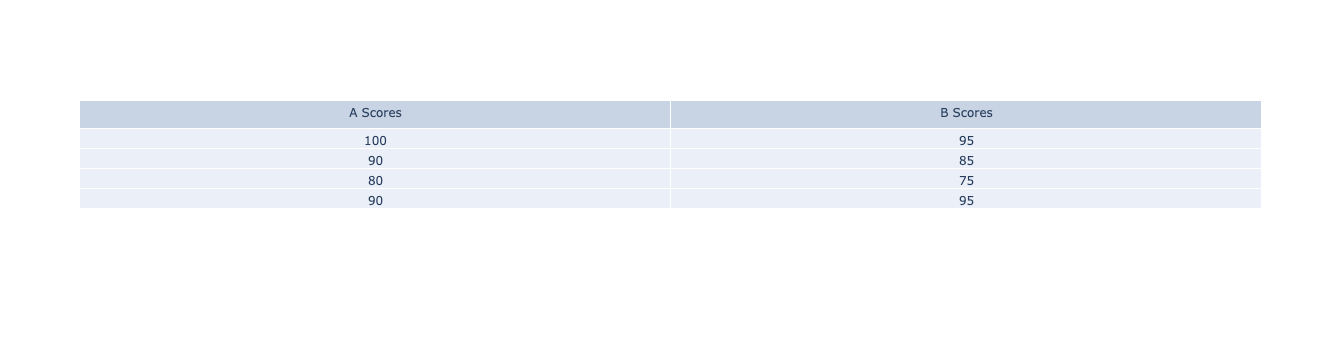

In [19]:

import plotly.graph_objects as go

data=go.Table(header=dict(values=['A Scores', 'B Scores']),
                 cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]]))
                     
fig = go.Figure([data])
fig

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from bs4 import BeautifulSoup
from requests import get

In [22]:
# define a scraper function
def lovely_soup(url):
    r = requests.get(url, headers = {'User-agent': 'Agent_Smith'})
    return BeautifulSoup(r.text, 'lxml')

In [26]:
# apply the function to our reddit source
#url = 'https://old.reddit.com/r/AskReddit/'
url = 'https://old.reddit.com/r/Showerthoughts?sort=top&t=week'
soup = lovely_soup(url)
# note: you can also try this one


In [27]:
# create a list of titles
titles = soup.findAll('p', {'class': 'title'})
titleslist=[]
for title in titles:
    titleslist.append(title.text)

In [28]:
titles

[<p class="title"><a class="title may-blank" data-event-action="title" href="/r/Showerthoughts/comments/tsbcld/once_the_titanic_disintegrates_there_will_be/" tabindex="1">Once the Titanic disintegrates, there will be conspiracy theorist who deny its existence.</a> <span class="domain">(<a href="/r/Showerthoughts/">self.Showerthoughts</a>)</span></p>,
 <p class="title"><a class="title may-blank" data-event-action="title" href="/r/Showerthoughts/comments/ts3s4o/youre_legally_allowed_to_throw_someone_s_ashes_in/" tabindex="1">You’re legally allowed to throw someone ‘s ashes in the Ocean but not their corpse.</a> <span class="domain">(<a href="/r/Showerthoughts/">self.Showerthoughts</a>)</span></p>,
 <p class="title"><a class="title may-blank" data-event-action="title" href="/r/Showerthoughts/comments/tscvs4/humans_are_the_only_large_mammals_on_earth_that/" tabindex="1">Humans are the only large mammals on earth that don’t have their population controlled by hunting</a> <span class="domain

In [31]:
# create a list of dates
dates = soup.findAll('time', {'class':"live-timestamp"})
dateslist=[]
for date in dates:
    output = str(date).split('title="')[1].split('2020')[0]
    dateslist.append(output)

In [32]:
# convert the two lists into a pandas dataframe
df_dict={'date':dateslist, 'post':titleslist}
working_df = pd.DataFrame(df_dict)
pd.set_option('display.max_colwidth', 200)
working_df['date'] = working_df['date'].str.strip()

### Clean-up

In [33]:
# write a function to clean up the post

def clean_that_post(row):
    x = row.split(' (self.AskReddit)')
    return x[0]

# test the function
print(working_df.loc[0,'post'])
print(clean_that_post(working_df.loc[0,'post']))

Once the Titanic disintegrates, there will be conspiracy theorist who deny its existence. (self.Showerthoughts)
Once the Titanic disintegrates, there will be conspiracy theorist who deny its existence. (self.Showerthoughts)


In [34]:
# apply the function
working_df['post']=working_df['post'].apply(clean_that_post)
working_df.head(3)

,date,post
0,"Wed Mar 30 17:14:26 2022 UTC"">7 hours ago</time>","Once the Titanic disintegrates, there will be conspiracy theorist who deny its existence. (self.Showerthoughts)"
1,"Wed Mar 30 10:57:05 2022 UTC"">13 hours ago</time>",You’re legally allowed to throw someone ‘s ashes in the Ocean but not their corpse. (self.Showerthoughts)
2,"Wed Mar 30 18:23:17 2022 UTC"">5 hours ago</time>",Humans are the only large mammals on earth that don’t have their population controlled by hunting (self.Showerthoughts)


In [35]:
# write a function to clean up the date
def parse_that_date(row):
    x = row.split(' ')[1:]
    y = ' '.join(x)
    z = '2020 '+ y
    return z[:20]

# test the function
parse_that_date(working_df.iloc[0,0])

'2020 Mar 30 17:14:26'

In [36]:
# apply the date parsing function and sort the dataframe
working_df['cleandate']=working_df['date'].apply(parse_that_date)
working_df['UTC_date'] = pd.to_datetime(working_df['cleandate'])
working_df.sort_values('UTC_date', inplace=True, ascending=False)

In [37]:
# split into 2 date/time variables
working_df['date']=working_df['UTC_date'].dt.date
working_df['time']=working_df['UTC_date'].dt.time
working_df.head()

,date,post,cleandate,UTC_date,time
23,2020-03-30,The amount of weird/amazing videos that we see on the internet is nothing compared to the amount of weird/amazing stuff that happens without it being recorded. (self.Showerthoughts),2020 Mar 30 22:41:10,2020-03-30 22:41:10,22:41:10
9,2020-03-30,Your brain automatically translates ‘wtf’ but not ‘lol’ (self.Showerthoughts),2020 Mar 30 22:07:58,2020-03-30 22:07:58,22:07:58
20,2020-03-30,Some day a million dollars won't be a lot of money. (self.Showerthoughts),2020 Mar 30 20:48:53,2020-03-30 20:48:53,20:48:53
14,2020-03-30,The hardest part of going back to the office is learning to hold in farts again. (self.Showerthoughts),2020 Mar 30 20:24:08,2020-03-30 20:24:08,20:24:08
4,2020-03-30,It must feel liberating to be certain that there is an after life. (self.Showerthoughts),2020 Mar 30 20:14:52,2020-03-30 20:14:52,20:14:52


### Final DF

In [39]:
final_df = working_df[['date', 'time', 'post']].copy()
final_df.head()

,date,time,post
23,2020-03-30,22:41:10,The amount of weird/amazing videos that we see on the internet is nothing compared to the amount of weird/amazing stuff that happens without it being recorded. (self.Showerthoughts)
9,2020-03-30,22:07:58,Your brain automatically translates ‘wtf’ but not ‘lol’ (self.Showerthoughts)
20,2020-03-30,20:48:53,Some day a million dollars won't be a lot of money. (self.Showerthoughts)
14,2020-03-30,20:24:08,The hardest part of going back to the office is learning to hold in farts again. (self.Showerthoughts)
4,2020-03-30,20:14:52,It must feel liberating to be certain that there is an after life. (self.Showerthoughts)


In [14]:
# write pandas df as html file 
# html = final_df.to_html(index=False) 
# text_file = open("docs/static/redditposts.html", "w") 
# text_file.write(html) 
# text_file.close() 

In [42]:
final_df.columns

Index(['date', 'time', 'post'], dtype='object')

In [43]:
data=go.Table(columnwidth = [200,200,1000],
                header=dict(values=final_df.columns, align=['left']),
                cells=dict(align=['left'],
                           values=[final_df['date'], 
                                   final_df['time'], 
                                   final_df['post'].values])
             )

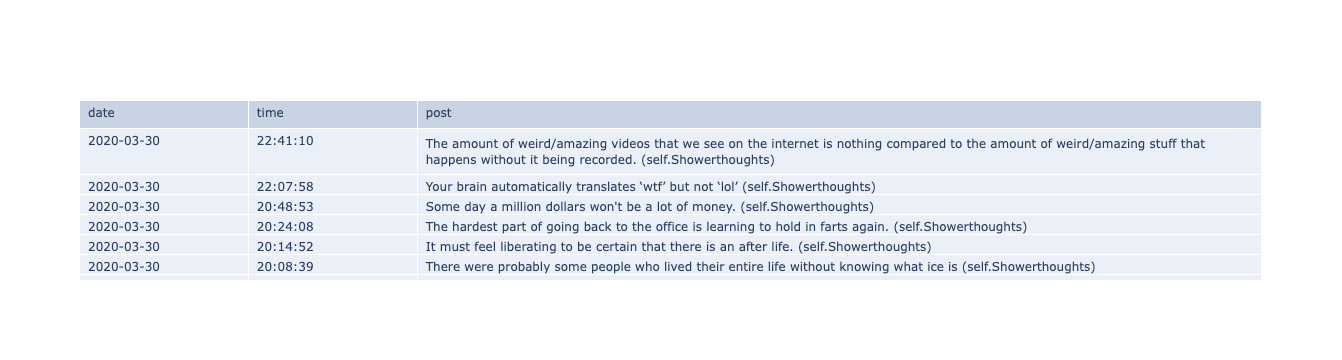

In [44]:
fig = go.Figure([data])
fig

In [45]:
# save as html
fig.write_html('table.html')